# Liste des modules

In [1]:
import tensorflow.keras as keras
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.losses import SparseCategoricalCrossentropy

In [3]:
train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=30,
      width_shift_range=0.3,
      height_shift_range=0.3,
      horizontal_flip=True,
      fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255)

In [4]:
path="/media/jhy/46AE-6494/DB/img/food/fruits_base/"

directory = path + 'Train'
Train = train_datagen.flow_from_directory(
    directory= directory,
    target_size=(32, 32),
    color_mode="rgb",
    batch_size=32,
    class_mode="categorical",
    shuffle=True,
)

directory = path + 'Test'
Test = test_datagen.flow_from_directory(
    directory= directory,
    target_size=(32, 32),
    color_mode="rgb",
    batch_size=32,
    class_mode="categorical",
    shuffle=False,
)

Found 33709 images belonging to 67 classes.
Found 11302 images belonging to 67 classes.


In [5]:
 label_map = (Train.class_indices)

In [6]:
print(label_map)

{'Apple': 0, 'Apricot': 1, 'Avocado': 2, 'Banana': 3, 'Beetroot': 4, 'Blueberry': 5, 'Cactus fruit': 6, 'Cantaloupe': 7, 'Carambula': 8, 'Cauliflower': 9, 'Cherry': 10, 'Chestnut': 11, 'Clementine': 12, 'Cocos': 13, 'Corn': 14, 'Cucumber Ripe': 15, 'Dates': 16, 'Eggplant': 17, 'Fig': 18, 'Ginger Root': 19, 'Granadilla': 20, 'Grape Blue': 21, 'Guava': 22, 'Hazelnut': 23, 'Huckleberry': 24, 'Kaki': 25, 'Kiwi': 26, 'Kohlrabi': 27, 'Kumquats': 28, 'Lemon': 29, 'Limes': 30, 'Lychee': 31, 'Mandarine': 32, 'Mango': 33, 'Mangostan': 34, 'Maracuja': 35, 'Melon Piel de Sapo': 36, 'Mulberry': 37, 'Nectarine': 38, 'Nut Forest': 39, 'Nut Pecan': 40, 'Onion Red': 41, 'Orange': 42, 'Papaya': 43, 'Passion Fruit': 44, 'Peach': 45, 'Pear': 46, 'Pepino': 47, 'Pepper Green': 48, 'Physalis': 49, 'Pineapple': 50, 'Pitahaya Red': 51, 'Plum': 52, 'Pomegranate': 53, 'Pomelo Sweetie': 54, 'Potato Red': 55, 'Quince': 56, 'Rambutan': 57, 'Raspberry': 58, 'Redcurrant': 59, 'Salak': 60, 'Strawberry': 61, 'Tamarillo

In [8]:
# Load the pretained model
pretrained_model = keras.applications.MobileNetV3Large(
    input_shape=(224,224, 3),
    include_top=False,
    weights='imagenet',
    pooling='avg'
)

In [9]:
inputs = pretrained_model.input

x = keras.layers.Dense(len(label_map), activation='relu')(pretrained_model.output)


outputs = keras.layers.Dense(len(label_map), activation='softmax')(x)

model = keras.Model(inputs=inputs, outputs=outputs)

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()

11/squeeze_excite/C
__________________________________________________________________________________________________
re_lu_68 (ReLU)                 (None, 1, 1, 672)    0           tf.__operators__.add_46[0][0]    
__________________________________________________________________________________________________
tf.math.multiply_46 (TFOpLambda (None, 1, 1, 672)    0           re_lu_68[0][0]                   
__________________________________________________________________________________________________
expanded_conv_11/squeeze_excite (None, 14, 14, 672)  0           multiply_33[0][0]                
                                                                 tf.math.multiply_46[0][0]        
__________________________________________________________________________________________________
expanded_conv_11/project (Conv2 (None, 14, 14, 112)  75264       expanded_conv_11/squeeze_excite/M
_________________________________________________________________________________________

In [10]:
history = model.fit(
    Train,
    validation_data=Test,
    epochs = 1)

1054/1054 [==============================] - 219s 203ms/step - loss: 2.5967 - accuracy: 0.3604 - val_loss: 16.3442 - val_accuracy: 0.0147


In [9]:
history.history['val_accuracy']

[0.43257829546928406]

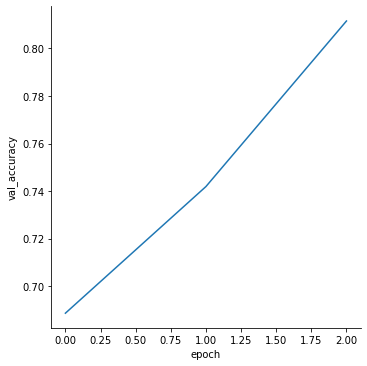

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
X = []
y = history.history['val_accuracy']
y2 = history.history['val_loss']
for x in range(len(y)):
    X.append(x)
ax = sns.relplot(x=X, y=y, kind="line")
ax.set(xlabel = "epoch", ylabel = "val_accuracy")
plt.show()


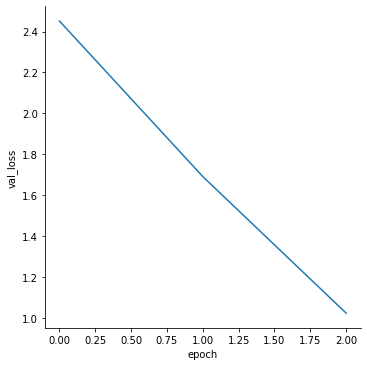

In [11]:
X = []
y = history.history['val_loss']
for x in range(len(y)):
    X.append(x)


ax = sns.relplot(x=X, y=y, kind="line")
ax.set(xlabel = "epoch", ylabel = "val_loss")
plt.show()

## TEST

In [12]:
def prediction (img_path,size = (224,224)):
    from tensorflow.keras.preprocessing import image
    import numpy as np
    
    img = image.load_img(img_path, target_size=size, color_mode = "rgb")
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    
    result = model.predict(x)
    y_classes = result.argmax(axis=-1)
    
    return y_classes

In [13]:
from IPython.display import Image

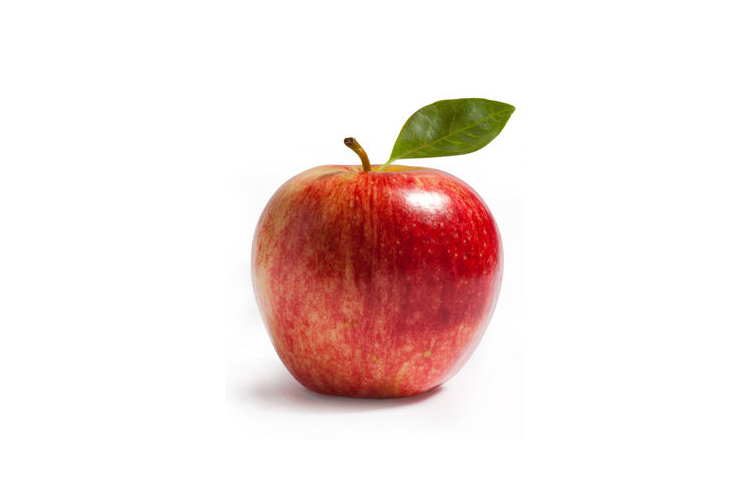

In [14]:
img_path="/media/jhy/46AE-6494/DB/img/food/Pomme/1.jpeg"
Image(filename=img_path)


In [15]:
for keys, values in label_map.items():  # for name, age in dictionary.iteritems():  (for Python 2.x)
    if values == prediction(img_path):
        print(keys)


Corn


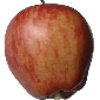

In [16]:
img_path="/media/jhy/46AE-6494/DB/img/food/fruits-360/Test-light/Apple Red 1/6_100.jpg"
Image(filename=img_path)

In [17]:
for keys, values in label_map.items():  # for name, age in dictionary.iteritems():  (for Python 2.x)
    if values == prediction(img_path):
        print(keys)

Grape Blue


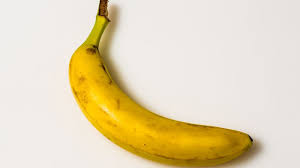

In [18]:
img_path="/media/jhy/46AE-6494/DB/img/food/Banane/01.jpeg"
Image(filename=img_path)

In [19]:
for keys, values in label_map.items():  # for name, age in dictionary.iteritems():  (for Python 2.x)
    if values == prediction(img_path):
        print(keys)

Corn


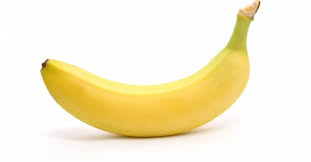

In [20]:
img_path="/media/jhy/46AE-6494/DB/img/food/Banane/02.jpeg"
Image(filename=img_path)

In [21]:
for keys, values in label_map.items():  # for name, age in dictionary.iteritems():  (for Python 2.x)
    if values == prediction(img_path):
        print(keys)

Corn


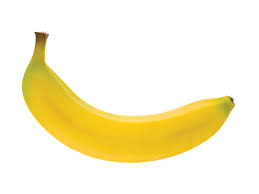

In [22]:
img_path="/media/jhy/46AE-6494/DB/img/food/Banane/03.jpeg"
Image(filename=img_path)


In [23]:
for keys, values in label_map.items():  # for name, age in dictionary.iteritems():  (for Python 2.x)
    if values == prediction(img_path):
        print(keys)

Corn


In [38]:
model.save('models/modele-prototype-131-Valpha')

INFO:tensorflow:Assets written to: models/modele-prototype-131-V3-heavy-goodpredict/assets


In [56]:
import pickle 

a_file = open("models/modele-prototype-131.pkl", "wb")

pickle.dump(label_map, a_file)

a_file.close()